# Tarea 3
## Matemáticas para la Ciencia de Datos
## Docente: **Briceyda B. Delgado**
## Alumno: **Luis Fernando Izquierdo Berdugo**
## Fecha: **12 de Septiembre de 2024**

### Instrucciones
Considere el siguiente sistema de ecuaciones diferenciales

#### $F' = (2-S)F$,  $F(0) = F_0$
#### $S' = (F-1)S$,  $S(0) = S_0$

1. (20 puntos) Dar una solución analítica del sistema, en términos de las
condiciones iniciales.
2. (10 puntos) Verifique que el sistema (1) admite el esquema numérico
### $F_{n+1} = F_n + \Delta t(2-S_n)F_n$
### $S_{n+1} = S_n + \Delta t(F_n-1)S_n$
Explique el procedimiento para llegar a la expresión anterior.

3. Realice un programa que implemente el esquema anterior y que realice las siguientes funciones:
    - (10 puntos) Acepte como entradas $S_0$, $F_0$ y $\Delta t$
    - (10 puntos) Calcule la solución numérica para t variando de 0 a 10. Indique la solución numérica cuando $S_0 = 0.1$, $F_0 = 1.9$ y $\Delta t = 0.001$
4. (20 puntos) Encuentre un segundo esquema numérico, usando Crank-Nicholson que represente al sistema de ecuaciones diferenciales.
5. (20 puntos) Grafique la solución numérica como una función de $t$ y en el espacio de estados en el sistema coordenado F-S.
6. (10 puntos) Explique alguna aplicación o fenómeno modelado a través de sistemas de ecuaciones diferenciales.

### Inciso 1

Si se tiene el sistema de ecuaciones siguiente:

#### $F' = (2-S)F$,  $F(0) = F_0$
#### $S' = (F-1)S$,  $S(0) = S_0$

Efectuando el cociente de ambas ecuaciones, podemos escribir

#### $\frac{ds}{df} = \frac{S(F-1)}{F(2-S)}$

Resolviendo por variables separables:

#### $F(2-S)ds = S(F-1)df$

#### $\frac{(2-S)}{S}ds = \frac{(F-1)}{F}df$

Se integran ambos lados

#### $2lnS - S = F - lnF + C$

Sustituyendo las condiciones iniciales y despejando C

#### $2lnS_0 - S_0 + lnF_0 - F_0 = C$

Obteniendo finalmente

#### $2lnS - S = F - lnF + 2lnS_0 - S_0 + lnF_0 - F_0$


## Inciso 2
Se introduce el paso de tiempo $\Delta t > 0$ y se define $t_n = n\Delta t$

$F_n$ y $S_n$ serán las aproximaciones de $F(t_n)$ y $S(t_n)$ respectivamente, ya que:

#### $\frac{F(t_{n+1})-F(t_n)}{\Delta t} \approx F'(t_n)$
#### $\frac{S(t_{n+1})-S(t_n)}{\Delta t} \approx S'(t_n)$

Entonces

#### $\frac{F_{n+1}-F_n}{\Delta t} = (2-S_n)F_n$
#### $\frac{S_{n+1}-S_n}{\Delta t} = (F_n-1)S_n$

Despejando se obtiene el esquema deseado:

#### $F_{n+1} = F_n + \Delta t(2-S_n)F_n$
#### $S_{n+1} = S_n + \Delta t(F_n-1)S_n$

### Inciso 3

In [1]:
import numpy as np

def sistEq(s0, f0, dt):
    t = np.arange(0, 10, dt)
    S = np.zeros_like(t)
    F = np.zeros_like(t)
    S[0] = s0
    F[0] = f0

    for i in range(1, len(t)):
        F[i] = F[i-1] + (dt*(2-S[i-1])*F[i-1])
        S[i] = S[i-1] + (dt*(F[i-1]-1)*S[i-1])

    return F, S, t


In [2]:
F,S,t = sistEq(0.1, 1.9, 0.001)
print(f"F: {F}")
print(f"S: {S}")
#print(f"t: {t}")

F: [1.9        1.90361    1.90722669 ... 0.00438735 0.0043865  0.00438565]
S: [0.1        0.10009    0.10018044 ... 2.19487384 2.19268859 2.19050552]


### Iniciso 4
Considerando el sistema simplificado:
#### $F'(t) = 2 - S(t), F(0) = F_0$
#### $S'(t) = F(t) - 1, S(0) = S_0$

La forma básica de Crank-Nicholson es:
#### $\frac{u_{n+1}-u_n}{\Delta t} = \frac{1}{2}(f(u_{n+1})+f(u_n))$

Si se aplica a ambas ecuaciones, se obtiene:
#### $\frac{F_{n+1}-F_n}{\Delta t} = \frac{1}{2}[(2-S_n)+(2-S_{n+1})]$
#### $\frac{S_{n+1}-S_n}{\Delta t} = \frac{1}{2}[(F_n-1)+ (F_{n+1}-1)]$

Lo cual se puede reescribir como

#### $2F_{n+1} + \Delta tS_{n+1} = 2F_n - \Delta tS_n + 4\Delta t$

#### $-\Delta tF_{n+1} + 2S_{n+1} = 2S_n + \Delta tF_n - 2\Delta t$

Con esto se puede obtener la matriz $A$:

```math
 A = \begin{bmatrix}
2 & \Delta t \\
-\Delta t & 2
\end{bmatrix}  
````
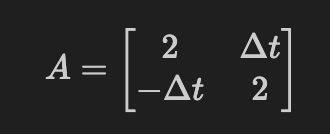

y el vector $b_n$:
```math
b_n = \begin{pmatrix}
2F_n - \Delta tS_n + 4\Delta t \\
2S_n + \Delta tF_n - 2\Delta t
\end{pmatrix}  
```
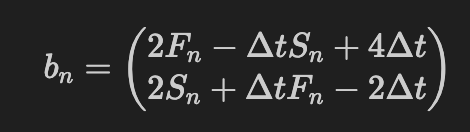

usando el vector $x_{n+1}$:
```math
x_{n+1} = \begin{pmatrix}
F_{n+1} \\
S_{n+1}
\end{pmatrix}  
```

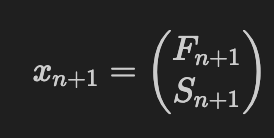

La ecuación se denota por $Ax_{n+1} = b_n$

Se saca el determinante de $A$:

```math
A^{-1} = \frac{1}{4-\Delta t^2} \begin{pmatrix}
2 & -\Delta t \\
\Delta t & 2
\end{pmatrix}
```
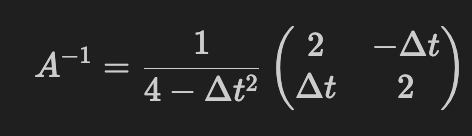
    

Entonces se tiene

```math
\begin{pmatrix}
F_{n+1} \\
S_{n+1}
\end{pmatrix}  = \frac{1}{4-\Delta t^2} \begin{pmatrix}
2 & -\Delta t \\
\Delta t & 2
\end{pmatrix} \begin{pmatrix}
2F_n - \Delta tS_n + 4\Delta t \\
2S_n + \Delta tF_n - 2\Delta t
\end{pmatrix}  
```
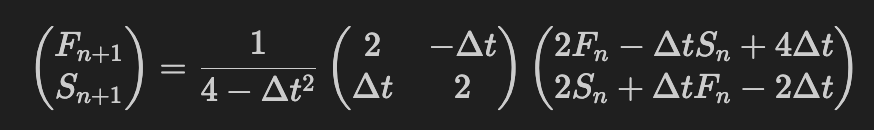

Multiplicando la matriz por el vector tenemos la solución para el tiempo $n+1$:

#### $F_{n+1} = \frac{1}{4-\Delta t^2} [(4-\Delta t^2)F_n - 4\Delta tS_n + 8\Delta t + 2\Delta t^2]$

#### $S_{n+1} = \frac{1}{4-\Delta t^2} [(4-\Delta t^2)S_n + \Delta tF_n - 4\Delta t + 4\Delta t^2]$

### Inciso 5

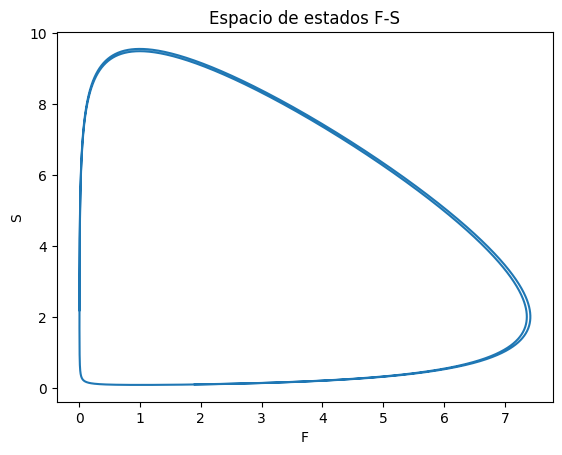

In [3]:
import matplotlib.pyplot as plt

plt.plot(F, S)
plt.xlabel('F')
plt.ylabel('S')
plt.title('Espacio de estados F-S')
plt.show()

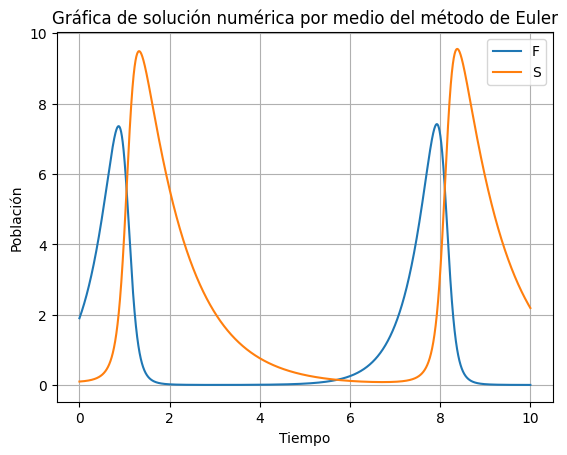

In [4]:
# Graficamos las soluciones
plt.plot(t, F, label='F')
plt.plot(t, S, label='S')
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title('Gráfica de solución numérica por medio del método de Euler')
plt.grid(True)
plt.show()

## Inciso 6

Las ecuaciones diferenciales pueden modelar distintos fenomenos cotidianos, como es el **enfriamiento del café**. Si te sirves una taza de café hirviendo, esta se irá enfriando hasta alcanzar la temperatura ambiente, lo cual puede modelarse utilizando una ecuación diferencial.

La tasa a la que el café se enfría es proporcional a la diferencia de temperatura entre el café y el ambiente. Lo cual quiere decir que cuanto más caliente esté el café en comparación con la habitación, más rápido se enfriará. Siendo su ecuación diferencial:

#### $\frac{dT}{dt} = -k(T - T_{ambiente})$

donde:
- $\frac{dT}{dt}$ es la tasa de cambio entre la temperatura de café en relación con el tiempo
- $k$ es una constante que depende del tamaño del material de la taza, el líquido que contiene, etc
- $T$ es la temperatura del café
- $T_{ambiente}$ es la temperatura ambiente